# Audio similarity

## Q1(a) 

In [1]:
# Run this cell to import pyspark and to define start_spark() and stop_spark()

import findspark

findspark.init()

import getpass
import pandas
import pyspark
import random
import re

from IPython.display import display, HTML
from pyspark import SparkContext
from pyspark.sql import SparkSession


# Functions used below
def username():
    """Get username with any domain information removed.
    """

    return re.sub('@.*', '', getpass.getuser())


def dict_to_html(d):
    """Convert a Python dictionary into a two column table for display.
    """

    html = []

    html.append(f'<table width="100%" style="width:100%; font-family: monospace;">')
    for k, v in d.items():
        html.append(f'<tr><td style="text-align:left;">{k}</td><td>{v}</td></tr>')
    html.append(f'</table>')

    return ''.join(html)


def show_as_html(df, n=20):
    """Leverage existing pandas jupyter integration to show a spark dataframe as html.

    Args:
        n (int): number of rows to show (default: 20)
    """

    display(df.limit(n).toPandas())

   
def display_spark():
    """Display the status of the active Spark session if one is currently running.
    """
    
    if 'spark' in globals() and 'sc' in globals():

        name = sc.getConf().get("spark.app.name")
        
        html = [
            f'<p><b>Spark</b></p>',
            f'<p>The spark session is <b><span style="color:green">active</span></b>, look for <code>{name}</code> under the running applications section in the Spark UI.</p>',
            f'<ul>',
            f'<li><a href="http://mathmadslinux2p.canterbury.ac.nz:8080/" target="_blank">Spark UI</a></li>',
            f'<li><a href="{sc.uiWebUrl}" target="_blank">Spark Application UI</a></li>',
            f'</ul>',
            f'<p><b>Config</b></p>',
            dict_to_html(dict(sc.getConf().getAll())),
            f'<p><b>Notes</b></p>',
            f'<ul>',
            f'<li>The spark session <code>spark</code> and spark context <code>sc</code> global variables have been defined by <code>start_spark()</code>.</li>',
            f'<li>Please run <code>stop_spark()</code> before closing the notebook or restarting the kernel or kill <code>{name}</code> by hand using the link in the Spark UI.</li>',
            f'</ul>',
        ]
        display(HTML(''.join(html)))
        
    else:
        
        html = [
            f'<p><b>Spark</b></p>',
            f'<p>The spark session is <b><span style="color:red">stopped</span></b>, confirm that <code>{username() + " (jupyter)"}</code> is under the completed applications section in the Spark UI.</p>',
            f'<ul>',
            f'<li><a href="http://mathmadslinux2p.canterbury.ac.nz:8080/" target="_blank">Spark UI</a></li>',
            f'</ul>',
        ]
        display(HTML(''.join(html)))


# Functions to start and stop spark
def start_spark(executor_instances=2, executor_cores=1, worker_memory=1, master_memory=1):
    """Start a new Spark session and define globals for SparkSession (spark) and SparkContext (sc).
    
    Args:
        executor_instances (int): number of executors (default: 2)
        executor_cores (int): number of cores per executor (default: 1)
        worker_memory (float): worker memory (default: 1)
        master_memory (float): master memory (default: 1)
    """

    global spark
    global sc

    user = username()
    
    cores = executor_instances * executor_cores
    partitions = cores * 4
    port = 4000 + random.randint(1, 999)

    spark = (
        SparkSession.builder
        .master("spark://masternode2:7077")
        .config("spark.driver.extraJavaOptions", f"-Dderby.system.home=/tmp/{user}/spark/")
        .config("spark.dynamicAllocation.enabled", "false")
        .config("spark.executor.instances", str(executor_instances))
        .config("spark.executor.cores", str(executor_cores))
        .config("spark.cores.max", str(cores))
        .config("spark.executor.memory", f"{worker_memory}g")
        .config("spark.driver.memory", f"{master_memory}g")
        .config("spark.driver.maxResultSize", "0")
        .config("spark.sql.shuffle.partitions", str(partitions))
        .config("spark.ui.port", str(port))
        .appName(user + " (jupyter)")
        .getOrCreate()
    )
    sc = SparkContext.getOrCreate()
    
    display_spark()
 
def stop_spark():
    """Stop the active Spark session and delete globals for SparkSession (spark) and SparkContext (sc).
    """

    global spark
    global sc

    if 'spark' in globals() and 'sc' in globals():

        spark.stop()

        del spark
        del sc

    display_spark()

# Make css changes to improve spark output readability
html = [
    '<style>',
    'pre { white-space: pre !important; }',
    'table.dataframe td { white-space: nowrap !important; }',
    'table.dataframe thead th:first-child, table.dataframe tbody th { display: none; }',
    '</style>',
]
display(HTML(''.join(html)))

In [2]:
# Run this cell to start a spark session in this notebook

start_spark(executor_instances=4, executor_cores=2, worker_memory=4, master_memory=4)

spark.dynamicAllocation.enabled,false
spark.executor.instances,4
spark.app.startTime,1716441803681
spark.driver.port,39605
spark.driver.memory,4g
spark.executor.memory,4g
spark.master,spark://masternode2:7077
spark.ui.port,4664
spark.executor.id,driver
spark.executor.cores,2
spark.driver.host,mathmadslinux2p.canterbury.ac.nz


+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------------------+
|  _c0|  _c1|  _c2|  _c3|  _c4|  _c5|  _c6|  _c7|  _c8|  _c9| _c10| _c11| _c12|  _c13| _c14|  _c15|  _c16|   _c17|   _c18|   _c19|   _c20|   _c21|   _c22|   _c23|   _c24|   _c25|                _c26|
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------------------+
|59.28| 4.15|5.105|2.275|2.185| 1.95|1.603|1.335|  1.3|1.396|1.395|1.267|1.171|-106.2|5.644|0.3426| 1.814|  1.033|-0.3445|-0.4305| 0.1372| 0.0312|-0.3132|-0.0815| 0.7213| -0.405|'TRHFHQZ12903C9E2D5'|
|46.35|6.888|4.652|4.131|3.225|2.826|2.108|1.922| 1.95|1.697|1.661|1.622|1.295|-117.8|5.945| 1.041| 8.891|-0.2149|   3.74| 0.2908|   1.92|  0.125|  1.242|-0.5187| 0.2548|-0.4073|'TRHFHYX12903CAF953'|


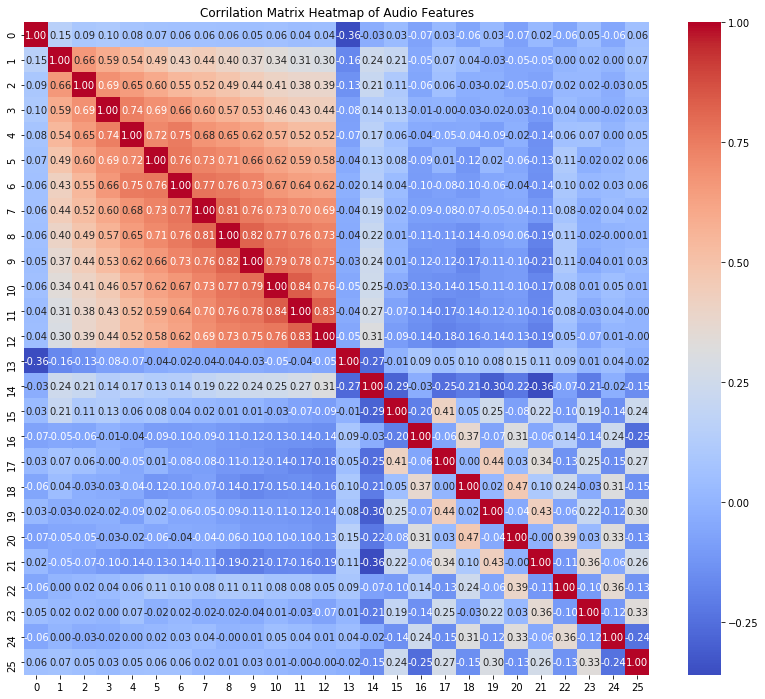

In [9]:
# Import modules from pyspark
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SparkSession
spark = SparkSession.builder.appName('Audio Features').getOrCreate()

# Read a small subset of audio features
small_features_df = (
    spark.read.format('com.databricks.spark.csv')
    .option('header', 'false')
    .option('inferSchema', 'true')
    .load('hdfs:///data/msd/audio/features/msd-jmir-mfcc-all-v1.0.csv')
)
small_features_df.show(10)

# Generate descriptive statistics
small_features_df.describe().show()

# Filter out the non-numeric columns
numeric_columns = [col for col, dtype in small_features_df.dtypes if dtype in ['int', 'double']]
numeric_features_df = small_features_df.select(numeric_columns)

# Check the corrilations
assembler = VectorAssembler(inputCols=numeric_columns, outputCol='features')
feature_vector = assembler.transform(numeric_features_df).select('features')
corrilation_matrix = Correlation.corr(feature_vector, 'features').head()[0]
print(corrilation_matrix)

# Generate visualization of corrilation matrix
corrilation_matrix_df = pd.DataFrame(corrilation_matrix.toArray())
plt.figure(figsize=(14,12))
sns.heatmap(corrilation_matrix_df, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Corrilation Matrix Heatmap of Audio Features')
plt.show()

## Q1(b) 

+------------------+--------------+
|          track_id|         genre|
+------------------+--------------+
|TRAAAAK128F9318786|      Pop_Rock|
|TRAAAAV128F421A322|      Pop_Rock|
|TRAAAAW128F429D538|           Rap|
|TRAAABD128F429CF47|      Pop_Rock|
|TRAAACV128F423E09E|      Pop_Rock|
|TRAAADT12903CCC339|Easy_Listening|
|TRAAAED128E0783FAB|         Vocal|
|TRAAAEF128F4273421|      Pop_Rock|
|TRAAAEM128F93347B9|    Electronic|
|TRAAAFD128F92F423A|      Pop_Rock|
+------------------+--------------+
only showing top 10 rows



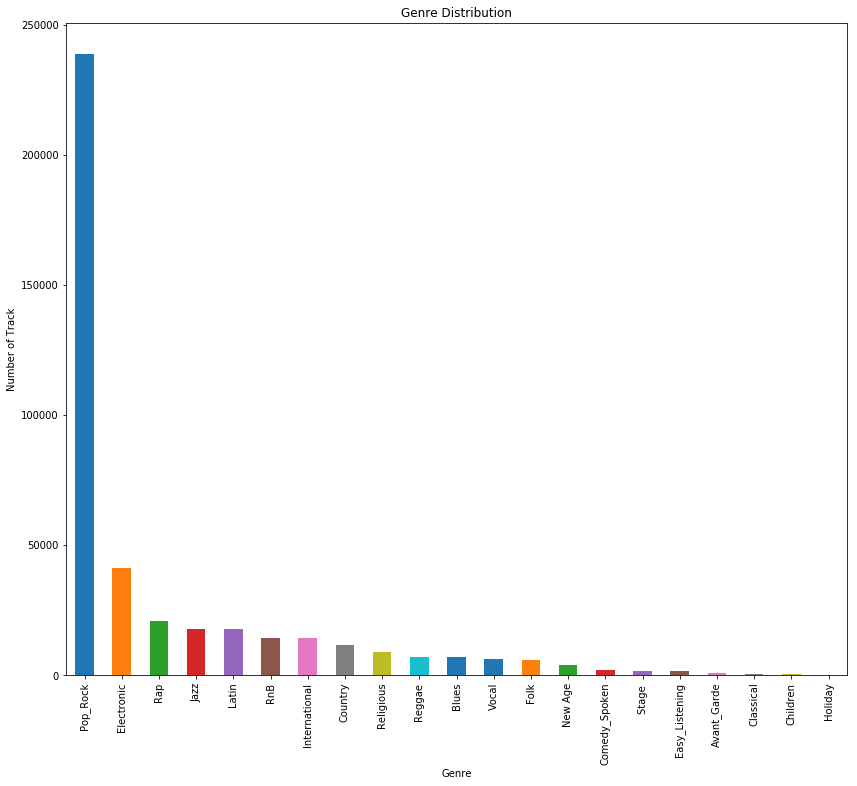

In [4]:
# Import modules from pyspark
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the SparkSession
spark = SparkSession.builder.appName('Genre MAGD').getOrCreate()

# Read the MAGD dataset
magd_df = (
    spark.read.format('com.databricks.spark.csv')
    .option('header', 'false')
    .option('inferSchema', 'true')
    .option('sep', '\t')
    .load('hdfs:///data/msd/genre/msd-MAGD-genreAssignment.tsv')
    .toDF('track_id', 'genre')
)
magd_df.show(10)

# Calculate the number of track_id for genre
magd_pd_df = magd_df.toPandas()
genre_count = magd_pd_df['genre'].value_counts()

# Plot a bar chart of genre distribution
plt.figure(figsize=(14,12))
genre_count.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Track')
plt.show()

## Q1(c) 

In [5]:
# Import modules from pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import trim, regexp_replace

# Initialize the SparkSession
spark = SparkSession.builder.appName('Features & Genre').getOrCreate()

# Read a small subset of audio features
features_df = (
    spark.read.format('com.databricks.spark.csv')
    .option('header', 'false')
    .option('inferSchema', 'true')
    .load('hdfs:///data/msd/audio/features/msd-jmir-mfcc-all-v1.0.csv')
    .toDF('_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8', 
          '_c9', '_c10', '_c11', '_c12', '_c13', '_c14', '_c15', '_c16', 
          '_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c24', 
          '_c25', 'track_id')
)

# Remove single quotes and trim spaces
features_df = features_df.withColumn('track_id', trim(regexp_replace(features_df['track_id'], "'", "")))
magd_df = magd_df.withColumn('track_id', trim(regexp_replace(magd_df['track_id'], "'", "")))

# Read the audio features dataset
merged_df = features_df.join(magd_df, on='track_id', how='inner')
merged_df.show(10)

+------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----+-------+-----+--------+------+-------+--------+-------+--------+-------+--------+--------+-------------+
|          track_id|  _c0|  _c1|  _c2|  _c3|  _c4|  _c5|  _c6|  _c7|  _c8|  _c9| _c10| _c11| _c12|  _c13| _c14|   _c15| _c16|    _c17|  _c18|   _c19|    _c20|   _c21|    _c22|   _c23|    _c24|    _c25|        genre|
+------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----+-------+-----+--------+------+-------+--------+-------+--------+-------+--------+--------+-------------+
|TRAAABD128F429CF47|57.59|4.997|3.014|3.032|2.673|2.116|2.191|1.633|1.662|1.813| 1.74|1.518|1.414|-113.0|9.427| 0.2554|1.946|  0.0479|0.7476|-0.3535|  0.6082| 0.7024|  0.3992| 0.1105| 0.09948| -0.2494|     Pop_Rock|
|TRAAGTO128F1497E3C|65.12|5.658|4.964|3.831|3.208|2.712|2.885|2.046|2.355|2.082|2.125|1.851|2.145|-150.7|15.17| -1.189|3.568|  -2.734|0.

## Q2(a) 

I chose chose Logistic Regression, Random Forest Classifier, and GBTClassifier. Logistic Regression is easy to understand and interpret, providing apparent coefficients. It's fast to train and works well with high-dimensional data. Random Forest offers high accuracy through ensemble methods and can handle large datasets, though it's slower to train and more complex to interpret. GBTClassifier, or Gradient-Boosted Tree Classifier, generally offers higher accuracy but at the cost of slower training and higher computational needs. It also handles high-dimensional data well.

To prepare the audio features for training, we need to standardize or normalize them to ensure they are on a similar scale. We should also handle any missing values by either imputing or removing them. Additionally, based on correlation analysis, we should remove highly correlated features to reduce multicollinearity.

## Q2(b) 

In [6]:
# Import modules from pyspark
from pyspark.sql.functions import when

# Calculate class balance
bi_genre_df = merged_df.withColumn('is_electronic', when(merged_df['genre'] == 'Electronic', 1).otherwise(0))
class_balance = bi_genre_df.groupBy('is_electronic').count()
class_balance.show()

# Display class balance 
elec_count = class_balance.filter(class_balance['is_electronic'] == 1).select('count').collect()[0][0]
non_elec_count = class_balance.filter(class_balance['is_electronic'] == 0).select('count').collect()[0][0]

print(elec_count)
print(non_elec_count)

+-------------+------+
|is_electronic| count|
+-------------+------+
|            1| 40666|
|            0|379954|
+-------------+------+

40666
379954


## Q2(c)(d)(e)

In [7]:
# Import modules from pyspark
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.sql.functions import col, when
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Initialize the SparkSession
spark = SparkSession.builder.appName('Binary Classification').getOrCreate()

# Sample a smaller portion for testing
bi_genre_df = bi_genre_df.sample(fraction=0.1, seed=123)

# Split the data using valid fractions
stratified_data = bi_genre_df.sampleBy('is_electronic', fractions={0: 0.8, 1: 0.8}, seed=123)
train, test = stratified_data.randomSplit([0.8, 0.2], seed=123)
 
# Using oversampling to handle class imbalance
train_major = train.filter(col('is_electronic') == 0)
train_minor = train.filter(col('is_electronic') == 1)
ratio = train_major.count() / train_minor.count()
train_minor_oversampled = train_minor.sample(True, ratio)
train_balanced = train_major.unionAll(train_minor_oversampled)

# Check the training set
train_balanced.groupBy('is_electronic').count().show()

# Assemble a feature vector
feature_columns = [col for col in bi_genre_df.columns if col not in ['track_id', 'genre', 'is_electronic']]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Standardize features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Define the models
lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='is_electronic')
rf = RandomForestClassifier(featuresCol='scaledFeatures', labelCol='is_electronic')
gbt = GBTClassifier(featuresCol='scaledFeatures', labelCol='is_electronic', maxIter=10)

# Create pipelines
pipe_lr = Pipeline(stages=[assembler, scaler, lr])
pipe_rf = Pipeline(stages=[assembler, scaler, rf])
pipe_gbt = Pipeline(stages=[assembler, scaler, gbt])

# Define parameter grids for hyperparameter tuning
paramGrid_lr = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01]) \
    .addGrid(lr.elasticNetParam, [0.0]) \
    .build()

paramGrid_rf = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10]) \
    .addGrid(rf.maxDepth, [5]) \
    .build()

paramGrid_gbt = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [5]) \
    .addGrid(gbt.maxIter, [10]) \
    .build()
 
# Define CrossValidator
cv_lr = CrossValidator(estimator=pipe_lr, estimatorParamMaps=paramGrid_lr, evaluator=BinaryClassificationEvaluator(labelCol='is_electronic'), numFolds=3)
cv_rf = CrossValidator(estimator=pipe_rf, estimatorParamMaps=paramGrid_rf, evaluator=BinaryClassificationEvaluator(labelCol='is_electronic'), numFolds=3)
cv_gbt = CrossValidator(estimator=pipe_gbt, estimatorParamMaps=paramGrid_gbt, evaluator=BinaryClassificationEvaluator(labelCol='is_electronic'), numFolds=3)

# Train and evaluate models
def evaluate_model(cv, train, test):
    model = cv.fit(train)
    predictions = model.transform(test)
    evaluator = BinaryClassificationEvaluator(labelCol='is_electronic')
    accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})

    # Use MulticlassClassificationEvaluator for other metrics
    multi_evaluator = MulticlassClassificationEvaluator(labelCol='is_electronic', predictionCol='prediction')
    precision = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedPrecision"})
    recall = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedRecall"})
    f1 = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "f1"})

    return accuracy, precision, recall, f1

accur_lr, precision_lr, recall_lr, f1_lr = evaluate_model(cv_lr, train_balanced, test)
accur_rf, precision_rf, recall_rf, f1_rf = evaluate_model(cv_rf, train_balanced, test)
accur_gbt, precision_gbt, recall_gbt, f1_gbt = evaluate_model(cv_gbt, train_balanced, test)
 
print(f"Logistic Regression - Accuracy: {accur_lr}, Precision: {precision_lr}, Recall: {recall_lr}, F1 Score: {f1_lr}")
print(f"Random Forest - Accuracy: {accur_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")
print(f"GBT Classifier - Accuracy: {accur_gbt}, Precision: {precision_gbt}, Recall: {recall_gbt}, F1 Score: {f1_gbt}")

+-------------+-----+
|is_electronic|count|
+-------------+-----+
|            1|24276|
|            0|24429|
+-------------+-----+

Logistic Regression - Accuracy: 0.7996312491339359, Precision: 0.8932308788457067, Recall: 0.7638557806912991, F1 Score: 0.8081060800533864
Random Forest - Accuracy: 0.8003596411543416, Precision: 0.8870426213507417, Recall: 0.7856078665077473, F1 Score: 0.8224470395730714
GBT Classifier - Accuracy: 0.8048155732446484, Precision: 0.8891048570866364, Recall: 0.7763706793802145, F1 Score: 0.8163729405253709


## Q2(f) 

Due to the large dataset size, I analyzed 10% of the data through sampling. According to the results,  logistic regression performs slightly better in precision but lags in recall and F1 score compared to random forest and gradient-boosting tree models. Hence, considering the overall performance of the models, random forest and gradient-boosting trees may be more suitable for this task.

Balancing the class distribution in the dataset through oversampling is particularly important when dealing with imbalanced datasets. Class balancing prevents the model from biasing towards the majority class, effectively enhancing the recall and F1 score of all models. The balanced dataset enables the models to identify electronic and non-electronic music better, thus improving overall performance.

## Q3(a) 

Logistic Regression comes with hyperparameters, namely regParam and elasticNetParam. regParam regulates the strength of regularization, with tested values of 0.01, 0.1, and 1.0. elasticNetParam governs the ratio between L1 and L2 regularization, with values of 0.0, 0.5, and 1.0. Random Forest involves hyperparameters, including numbers and max depth. Numbers indicate the number of trees, with experimented values of 10, 20, and 50. max depth signifies the maximum depth of the trees, with explored values of 5, 10, and 15. GBT's hyperparameters comprise maxDepth and maxIter. For the max depth parameter, we've tested it across various values such as 5, 10, and 15, which dictate the maximum depth the trees can reach. As for maxIter, it stands for the number of iterations or trees in the model, and we've explored options including 10, 20, and 50. By experimenting with this diverse range of parameter values, we aim to uncover the most effective combinations.

## Q3(b) 

Cross-validation serves as a technique for assessing the effectiveness of a model. It involves splitting the dataset into k subsets, training, and validating the model k times. Each time, a different subset is used for validation while the rest are used for training. The final model performance is evaluated by averaging the results of these k validations. Cross-validation is advantageous for hyperparameter tuning for several reasons: it reduces the risk of overfitting, ensures model performance on different data subsets through multiple validations, provides more stable and reliable performance evaluation, and helps find the optimal hyperparameter combination for performance through various validations.

## Q3(c) 

The general steps for tuning hyperparameters include defining the objective, which refers to the performance metric to be optimized (such as accuracy, F1 score, etc.). Next, select the hyperparameters to be tuned, such as regParam and elasticNetParam, for Logistic Regression. Then, choosing possible ranges for each hyperparameter, for example, 0.01, 0.1, 1.0 for regParam, and 0.0, 0.5, 1.0 for elasticNetParam, to construct a hyperparameter grid and finally, executing cross-validation to find the best-performing combination of hyperparameters through multiple validations. Through such hyperparameter tuning, model performance can typically be significantly improved, especially when the initially selected hyperparameter values are far from optimal. The degree of performance enhancement relies on the dataset's attributes and the model's intricacy.

## Q4(a) 

I selected Random Forest from the options provided, as it naturally extends to multi-class classification tasks. Random Forest creates multiple decision trees, each making individual predictions, then aggregates these predictions through voting to select the class with the most votes.

## Q4(b) 

In [7]:
# Import modules from pyspark
from pyspark.ml.feature import StringIndexer

# Convert genre column to integer index
indexer = StringIndexer(inputCol="genre", outputCol="genreIndex")
bi_genre_df = indexer.fit(bi_genre_df).transform(bi_genre_df)

bi_genre_df.show(10)

+------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----+-------+-----+--------+------+-------+--------+-------+--------+-------+--------+--------+-------------+-------------+----------+
|          track_id|  _c0|  _c1|  _c2|  _c3|  _c4|  _c5|  _c6|  _c7|  _c8|  _c9| _c10| _c11| _c12|  _c13| _c14|   _c15| _c16|    _c17|  _c18|   _c19|    _c20|   _c21|    _c22|   _c23|    _c24|    _c25|        genre|is_electronic|genreIndex|
+------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----+-------+-----+--------+------+-------+--------+-------+--------+-------+--------+--------+-------------+-------------+----------+
|TRAAABD128F429CF47|57.59|4.997|3.014|3.032|2.673|2.116|2.191|1.633|1.662|1.813| 1.74|1.518|1.414|-113.0|9.427| 0.2554|1.946|  0.0479|0.7476|-0.3535|  0.6082| 0.7024|  0.3992| 0.1105| 0.09948| -0.2494|     Pop_Rock|            0|       0.0|
|TRAAGTO128F1497E3C|65.12|5.658|4.96

## Q4(c) 

In [8]:
# Import modules from pyspark
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Initialize the SparkSession
spark = SparkSession.builder.appName('Multiclass Classification').getOrCreate()

# Sample a smaller portion for testing
bi_genre_df = bi_genre_df.sample(fraction=0.1, seed=123)
 
# Split the data into training and test sets
train, test = bi_genre_df.randomSplit([0.8, 0.2], seed=123)

# Calculate the number of instances for each class
class_counts = train.groupBy('genreIndex').count().collect()
max_count = max(row['count'] for row in class_counts)

# Perform oversampling on the minority classes
train_balanced = train
for row in class_counts:
    minority_class_df = train.filter(train['genreIndex'] == row['genreIndex'])
    fraction_to_sample = (max_count - row['count']) / row['count']
    train_balanced = train_balanced.union(minority_class_df.sample(withReplacement=True, fraction=fraction_to_sample))

# Check the balanced training set
train_balanced.groupBy('genreIndex').count().show()
 
# Assemble a feature vector
feature_columns = [col for col in bi_genre_df.columns if col not in ['track_id', 'genre', 'genreIndex']]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Standardize features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Define the Random Forest model 
rf = RandomForestClassifier(featuresCol='scaledFeatures', labelCol='genreIndex')

# Create pipelines
pipe_rf = Pipeline(stages=[assembler, scaler, rf])

# Define parameter grids for hyperparameter tuning
paramGrid_rf = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10]) \
    .addGrid(rf.maxDepth, [5]) \
    .build()

# Define CrossValidator
cv_rf = CrossValidator(estimator=pipe_rf, estimatorParamMaps=paramGrid_rf, evaluator=MulticlassClassificationEvaluator(labelCol='genreIndex'), numFolds=3)

# Train and evaluate models
def evaluate_model(cv, train, test):
    model = cv.fit(train)
    predictions = model.transform(test)
    evaluator = MulticlassClassificationEvaluator(labelCol='genreIndex', predictionCol='prediction')
    accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
    f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

    return accuracy, precision, recall, f1

accur_rf, precision_rf, recall_rf, f1_rf = evaluate_model(cv_rf, train_balanced, test)
 
print(f"Random Forest - Accuracy: {accur_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")

+----------+-----+
|genreIndex|count|
+----------+-----+
|       6.0|19571|
|      13.0|19121|
|      16.0|18992|
|      19.0|19472|
|       7.0|19517|
|       4.0|19273|
|      20.0|19159|
|       9.0|19436|
|      18.0|19047|
|       3.0|19231|
|      11.0|19176|
|      12.0|19029|
|       1.0|19278|
|      10.0|19161|
|       5.0|19213|
|      17.0|19204|
|       8.0|19314|
|      14.0|19317|
|       0.0|19206|
|       2.0|19178|
+----------+-----+
only showing top 20 rows

Random Forest - Accuracy: 0.39830204472079395, Precision: 0.6555300267305421, Recall: 0.39830204472079395, F1 Score: 0.46955004674648865


In [ ]:
stop_spark()